## Задание №1


Импортируйте библиотеки pandas, numpy и matplotlib.


In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import warnings
warnings.filterwarnings('ignore')

Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.

In [132]:
from sklearn.datasets import load_boston
data = load_boston()

In [133]:
data.keys()
X = pd.DataFrame(data.data, columns = data.feature_names)
y = data.target
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

In [134]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Масштабируйте данные с помощью StandardScaler.

In [135]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaler = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaler = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
X_train_scaler.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
399,-0.387850,-0.500320,-0.352167,-0.278089,-0.310348,-0.677264,0.834884,-0.750355,-0.507797,-0.120700,1.159817,0.430731,0.873419
400,-0.373414,0.364589,-0.584520,-0.278089,-0.786706,-0.649038,-0.946216,0.291651,-0.740922,-1.090773,0.126546,0.353970,0.076412
401,-0.405470,2.959318,-1.303361,-0.278089,-1.033391,0.450354,-1.389703,2.130899,-0.624360,-0.747331,-0.592251,0.379010,-0.910692
402,0.851897,-0.500320,1.033237,-0.278089,1.561057,0.441886,0.931450,-0.790898,1.706891,1.578434,0.845343,-2.694586,1.522570
403,-0.381356,-0.500320,-0.352167,-0.278089,-0.310348,0.125758,0.602411,-0.513719,-0.507797,-0.120700,1.159817,-3.121581,-0.257316


Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.

In [136]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaler)
X_train_tsne.shape

(404, 2)

Постройте диаграмму рассеяния на этих данных.

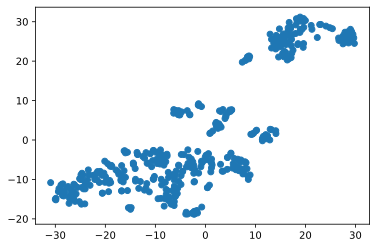

In [137]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

## Задание №2

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

In [138]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 3, max_iter = 100, random_state = 42)


In [139]:
train_labels = model.fit_predict(X_train_scaler)
labels_3 = pd.Series(train_labels, name = 'l_3')
labels_3[:5]

0    1
1    2
2    0
3    1
4    2
Name: l_3, dtype: int32

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

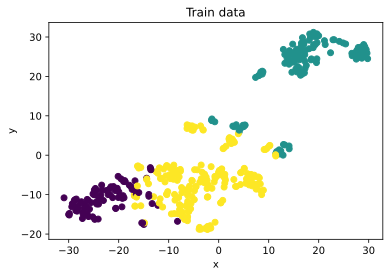

In [140]:
centers = scaler.inverse_transform(model.cluster_centers_)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=train_labels)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Train data')
plt.show()

<AxesSubplot:xlabel='component_1', ylabel='component_2'>

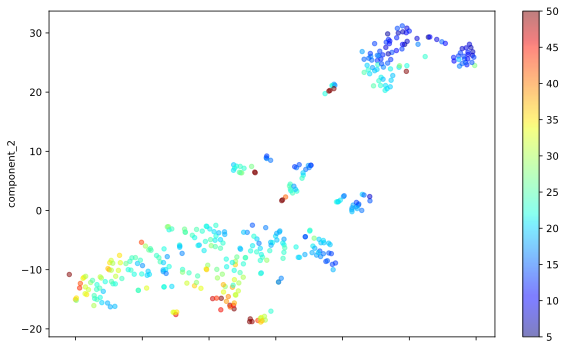

In [141]:
X_train_T = pd.DataFrame(data = X_train_tsne, columns = ['component_1', 'component_2'])
components_with_labels = pd.concat([X_train_T, pd.DataFrame(y_train)], axis=1)
figsize = (10, 6)
components_with_labels.plot(kind='scatter', x='component_1', y='component_2', 
                                         c=components_with_labels.iloc[:, -1], cmap=plt.get_cmap('jet'),
                                         alpha=0.5, figsize=figsize)

<AxesSubplot:title={'center':'Разбиение на кластеры'}, xlabel='component_1', ylabel='component_2'>

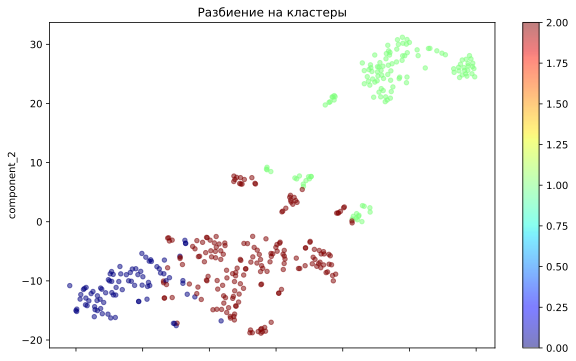

In [142]:
components_with_labels = pd.concat([X_train_T, pd.DataFrame(labels_3)], axis=1)
figsize = (10, 6)
components_with_labels.plot(kind='scatter', x='component_1', y='component_2', 
                                         c=labels_3, cmap=plt.get_cmap('jet'), alpha=0.5, figsize=figsize, title='Разбиение на кластеры')

Вычислите средние значения price и CRIM в разных кластерах.

In [143]:
y_train.mean()

22.796534653465343

In [144]:
for i in range(3):
    spam = y_train[train_labels == i].mean()
    print(f'Кластер - {i}: Средняя цена - {spam}')

Кластер - 0: Средняя цена - 27.78837209302326
Кластер - 1: Средняя цена - 16.165354330708663
Кластер - 2: Средняя цена - 24.958115183246072


In [145]:
X_train['CRIM'].mean()

3.609124628712873

In [146]:
for i in range(3):
    spam = X_train.loc[train_labels == i, 'CRIM'].mean()
    print(f'Кластер - {i}: Показатель "CRIM" - {spam}')
# X_train.loc[train_labels == 0, 'CRIM'].mean()

Кластер - 0: Показатель "CRIM" - 0.07356558139534886
Кластер - 1: Показатель "CRIM" - 10.797028425196853
Кластер - 2: Показатель "CRIM" - 0.42166020942408367


## Задание №3

Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.

In [147]:
X_test_tsne = tsne.fit_transform(X_test_scaler)
test_labels = model.fit_predict(X_test_scaler)
labels_3 = pd.Series(test_labels, name = 'l_3')
X_test_T = pd.DataFrame(data = X_test_tsne, columns = ['component_1', 'component_2'])

<AxesSubplot:title={'center':'Разбиение на кластеры'}, xlabel='component_1', ylabel='component_2'>

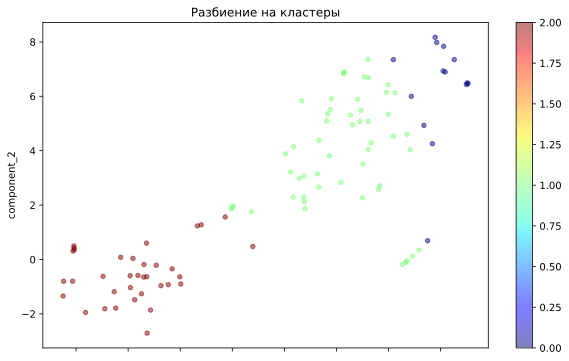

In [148]:
X_test_T.plot(kind='scatter', x='component_1', y='component_2', 
                c=labels_3, cmap=plt.get_cmap('jet'), alpha=0.5, figsize=figsize, title='Разбиение на кластеры')

In [149]:
for i in range(3):
    spam = y_test[test_labels == i].mean()
    print(f'Кластер - {i}: Средняя цена - {spam}')

Кластер - 0: Средняя цена - 33.871428571428574
Кластер - 1: Средняя цена - 21.552830188679245
Кластер - 2: Средняя цена - 16.43714285714286


In [150]:
for i in range(3):
    spam = X_test.loc[test_labels == i, 'CRIM'].mean()
    print(f'Кластер - {i}: Показатель "CRIM" - {spam}')

Кластер - 0: Показатель "CRIM" - 0.08618571428571427
Кластер - 1: Показатель "CRIM" - 0.25200716981132076
Кластер - 2: Показатель "CRIM" - 10.165531142857143
